Importing **dependencies**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Loading the **dataset**

In [54]:
daibets = pd.read_csv('/content/sample_data/diabetes.csv')

In [55]:
daibets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**to see the shape of the dataset (rows and columns)**

In [56]:
daibets.shape

(768, 9)

**to see the statistics of the dataset**

In [57]:
daibets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**To see the information of the dataset**

In [58]:
daibets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**checking if there is null value in each colmn**

In [59]:
daibets.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**to count the categories of class**

In [60]:
counts= daibets['Outcome'].value_counts()

In [61]:
counts

,count
Outcome,
0,500
1,268


0 --> non daibetic

1 --> daibetic

to find the mean of each column based on the **outcome**

In [62]:
daibets.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Visualizing using bar**

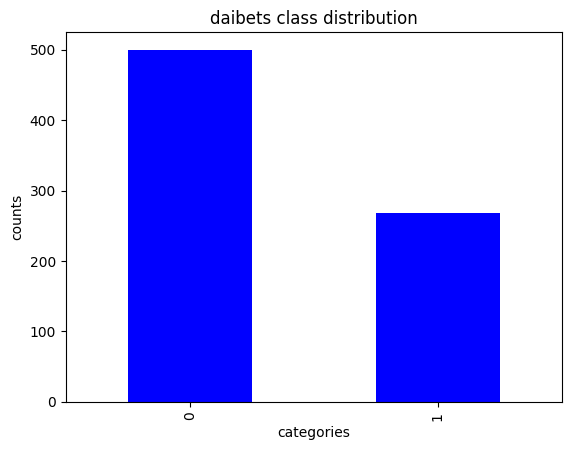

In [63]:
counts.plot(kind='bar',color='blue')
plt.title('daibets class distribution')
plt.xlabel('categories')
plt.ylabel('counts')
plt.show()

# separating data and labels( X and Y set)

In [64]:
X = daibets.drop(columns='Outcome',axis=1)

In [65]:
Y = daibets['Outcome']

In [66]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [67]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


**Train Test Split**

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [69]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


**Data standardization**

fit only training data and transform both training and test data.

 why we aren't fit the test data is the model cheats from the scaler if we fit it

In [70]:
scalar = StandardScaler()

In [71]:
scalar.fit(X_train)

StandardScaler()

In [72]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [73]:
X_train_scaled

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]])

In [74]:
X_test_scaled

array([[ 0.96054099,  1.20788789, -0.29601471, ..., -0.58221684,
        -0.55579092,  0.56103382],
       [ 1.86648903, -1.67775979,  1.98813468, ...,  0.44897876,
        -0.58306107,  1.15306018],
       [-0.5493724 ,  0.03460257,  0.3565994 , ...,  0.499902  ,
         0.01688223, -0.6230189 ],
       ...,
       [-0.5493724 , -1.23381399, -0.94862882, ..., -0.44217793,
         3.70138246, -0.70759409],
       [ 0.05459296,  2.00064824,  0.46536842, ...,  0.6399409 ,
        -0.64669142, -0.20014293],
       [-0.85135507, -1.58262854,  0.46536842, ...,  0.15617013,
        -0.16794879, -1.04589487]])

**Fiting data to the model and training it**

In [75]:
model=SVC(kernel='linear')

In [76]:
model.fit(X_train_scaled,Y_train)

SVC(kernel='linear')

**evaluate the model on training data**

In [77]:
x_train_prediction = model.predict(X_train_scaled)
x_train_evaluation = accuracy_score(x_train_prediction,Y_train)

In [78]:
x_train_evaluation

0.7915309446254072

**evaluation on test data**

In [79]:
x_test_prediction = model.predict(X_test_scaled)
x_test_evaluation = accuracy_score(x_test_prediction,Y_test)

In [80]:
x_test_evaluation

0.7207792207792207

# Dabets Prediction System
**lets make a prediction on new data**




In [88]:
data =(0	,137	,40	,35	,168	,43.1	,2.288	,33	)

**changing to numpy array**

In [89]:
dnp = np.asarray(data)

**reshaping this array**

why we reshaped the array is since we trained the model with huge dataset , it expects as it was trained , thus way is we are just telling the model as one data point which is 1D

In [90]:
dnp_reshaped = dnp.reshape(1,-1)

we need to transform it

In [91]:
dnp_reshaped_scaled = scalar.transform(dnp_reshaped)

In [85]:
import warnings
warnings.filterwarnings("ignore")


**predicting**

In [94]:
prediction = model.predict(dnp_reshaped_scaled)

In [97]:
print(prediction)
if (prediction[0]==0):
    print("the person is not daibetic")
else:
    print("the person is daibetic")

[1]
the person is daibetic


**Great now our model is performing well...................!!**